# Data Preprocessing & Feature Engineering
In this notebook I will continue preparing the Ames housing data fro modeling by:
- handling outliers
- engineering new features to enhance model performance
- encoding categorical variables
- scaling numerical features for model compatibility
- splitting the data into training and testing sets

## Load Data

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df = pd.read_csv('../data/ames_housing_cleaned.csv')

## Handling Outliers
In this step, I will focus on a set of core features identified during EDA as being strongly correlated with `SalePrice`. Additionally, I will include features necessary for constructing engineered variables.

**Core Features (Strong Correlation with SalePrice):**
- `Overall Qual`
- `Gr Liv Area`
- `Garage Cars`
- `Total Bsmt SF`
- `Year Built` (to be used for calculating `HouseAge`)

**Additional Features for Engineering:**
- `1st Flr SF` and `2nd Flr SF` (to compute `Total SF`)
- `Yr Sold` (to compute `House Age`)

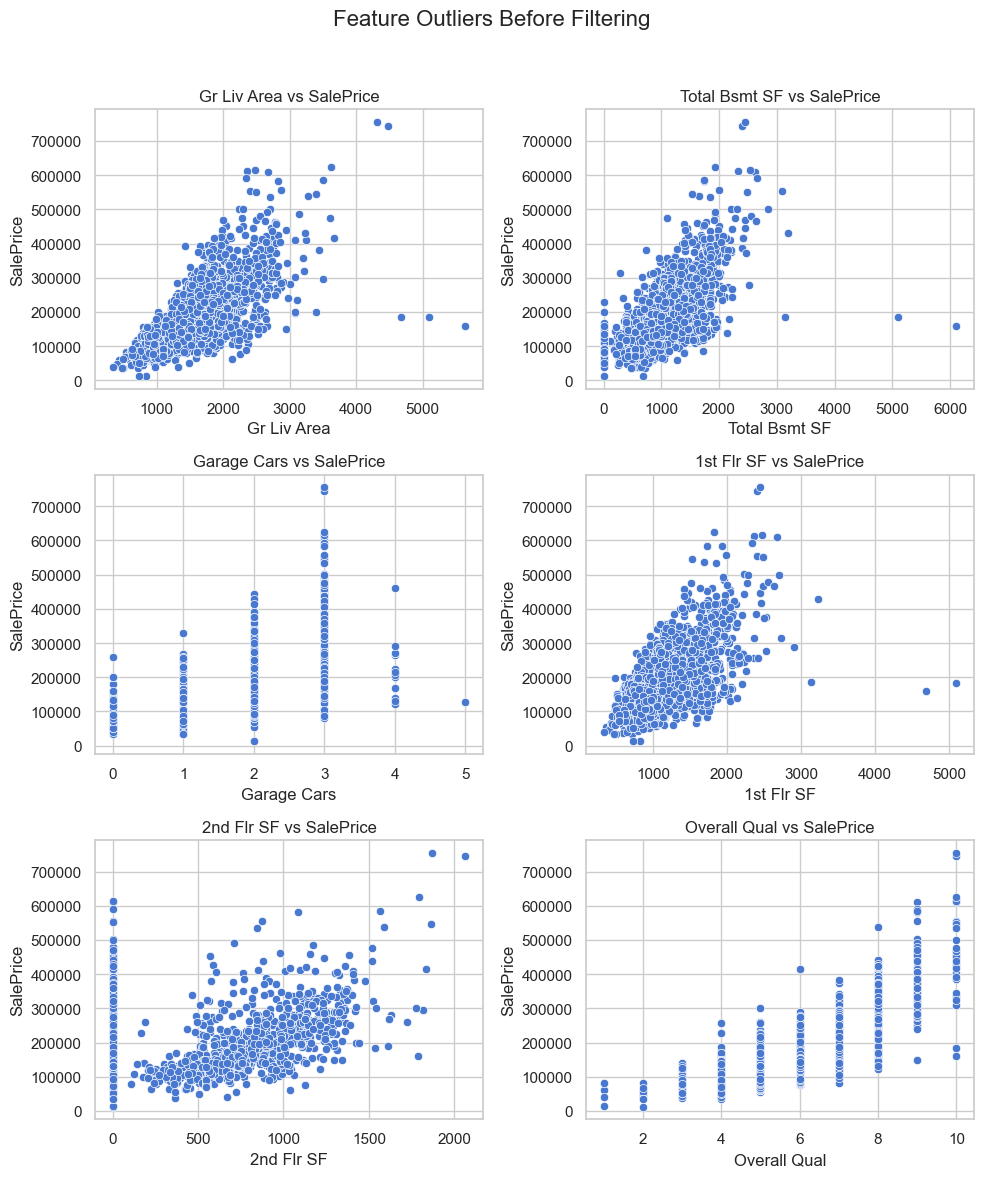

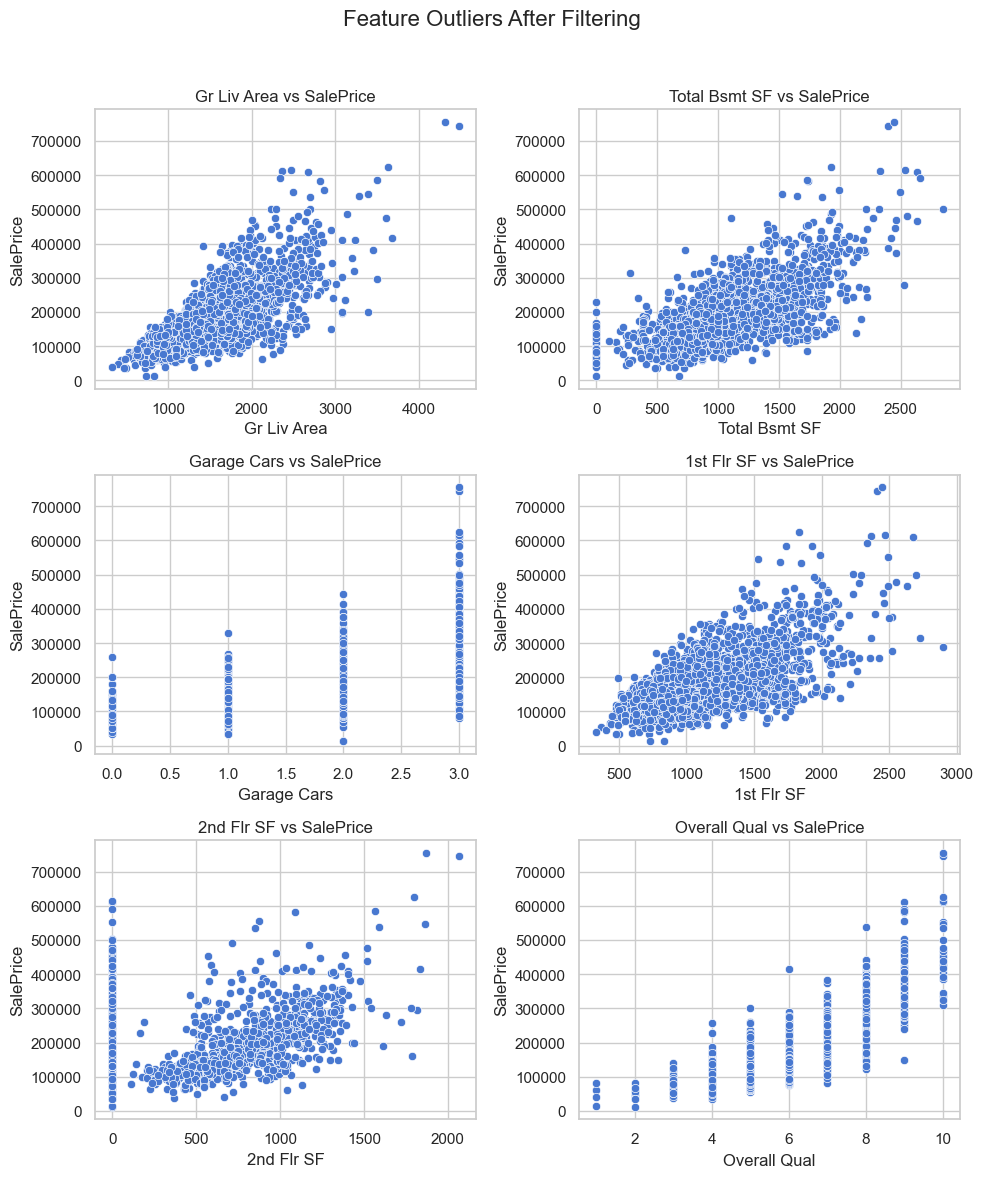

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted", context="notebook")

def plot_outliers_grid(df, features, target='SalePrice', title=''):
    fig, axs = plt.subplots(3, 2, figsize=(10, 12))
    axs = axs.flatten()
    
    for i, feature in enumerate(features):
        sns.scatterplot(x=df[feature], y=df[target], ax=axs[i])
        axs[i].set_title(f'{feature} vs {target}')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define features
outlier_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', '1st Flr SF', '2nd Flr SF', 'Overall Qual']

# Plot before removing outliers
plot_outliers_grid(df, outlier_features, title='Feature Outliers Before Filtering')

# Apply outlier filters
df_filtered = df.copy()
df_filtered = df_filtered[df_filtered['Gr Liv Area'] < 4500]
df_filtered = df_filtered[df_filtered['Total Bsmt SF'] < 3000]
df_filtered = df_filtered[df_filtered['Garage Cars'] <= 3]
df_filtered = df_filtered[df_filtered['1st Flr SF'] < 3000]

# Plot after removing outliers
plot_outliers_grid(df_filtered, outlier_features, title='Feature Outliers After Filtering')

I visualized key numeric features against `SalePrice` to identify outliers.  
Based on those plots, I removed extreme values for:
- **Gr Liv Area** (> 4500 sq ft)
- **Total Bsmt SF** (> 3000 sq ft)
- **Garage Cars** (> 3)
- **1st Flr SF** (> 3000 sq ft)

No action was needed for **2nd Flr SF** and **Overall Qual**.  
I also noted the potential for a binary feature for second floors later.

## Feature Engineering

## Encoding Categorical Variables

## Scaling Numerical Features

## Splitting Data